# **Retail Price Optimization Using Machine Learning and Deep Learning Techniques**

BY :

024 FURKAN MISTRY

19 MANDAR TARMALE

## **Introduction**

In today's competitive e-commerce landscape, retailers must leverage data-driven strategies to optimize pricing and enhance profitability. This project focuses on employing advanced Machine Learning (ML) and Deep Learning (DL) techniques to predict optimal prices for products listed on the online marketplace, Mercari. Utilizing a rich dataset that includes various product attributes such as item_condition, brand_name, category_name, and item_description, we aim to develop robust predictive models using XGBoost and Long Short-Term Memory (LSTM) networks.

Through systematic data preprocessing, model building, and evaluation, we will assess the effectiveness of these approaches in capturing the complexities of pricing strategies. The ultimate goal is to provide insights that can aid retailers in making informed pricing decisions, improving customer satisfaction, and increasing market competitiveness.

About Mercari Price Dataset

About - Mercari is the selling application where we can sell (or buy) almost anything. We all have stuff that we don't use, but that stuff still has value. Mercari helps us sell it, ship it, and earn some cash.

Data Description:

1. train_id or test_id - the id of the listing.

2. name - the title of the listing.

3. item_condition_id - the condition of the items provided by the seller. Lower the number, better the condition.

4. category_name - category of the listing.

5. brand_name - brand of the listing.

6. price - the price that the item was sold for. This is the target variable that we need to predict. The unit is USD.

7. shipping - 1 if shipping fee is paid by seller and 0 by buyer.

8. item_description - the full description of the item.


Importing Library

In [ ]:
# Reload modules
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from numpy import median
from scipy.stats import norm
import re
import math

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set(style='darkgrid')

import plotly
from plotly.offline import iplot
import plotly.graph_objects as go

Loading the Data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_table('/content/drive/MyDrive/train.tsv')

In [ ]:
# df = pd.read_table('train.tsv')

In [ ]:
# df = df.sample(frac=0.2, random_state=42)

In [ ]:
df.shape

(1482535, 8)

Data data has 1482535 observations and 8 features.

In [ ]:
df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


## Exploratory Data Analysis

Checking Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482529 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


Checking Percentage of missing values in each column

In [ ]:
(df.isna().sum() / df.shape[0]) * 100

,0
train_id,0.000000
name,0.000000
item_condition_id,0.000000
category_name,0.426769
brand_name,42.675687
price,0.000000
shipping,0.000000
item_description,0.000405


The columns brand_name, category_name and item_description has missing values.42.67% of brand_name values are missing.

In [ ]:
df.describe(include='all')

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
count,1.482535e+06,1482535,1.482535e+06,1476208,849853,1.482535e+06,1.482535e+06,1482529
unique,NaN,1225273,NaN,1287,4809,NaN,NaN,1281425
top,NaN,Bundle,NaN,"Women/Athletic Apparel/Pants, Tights, Leggings",PINK,NaN,NaN,No description yet
freq,NaN,2232,NaN,60177,54088,NaN,NaN,82489
mean,7.412670e+05,NaN,1.907380e+00,NaN,NaN,2.673752e+01,4.472744e-01,NaN
std,4.279711e+05,NaN,9.031586e-01,NaN,NaN,3.858607e+01,4.972124e-01,NaN
min,0.000000e+00,NaN,1.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,NaN
25%,3.706335e+05,NaN,1.000000e+00,NaN,NaN,1.000000e+01,0.000000e+00,NaN
50%,7.412670e+05,NaN,2.000000e+00,NaN,NaN,1.700000e+01,0.000000e+00,NaN
75%,1.111900e+06,NaN,3.000000e+00,NaN,NaN,2.900000e+01,1.000000e+00,NaN


Insights:
- Most of the names are unique.
- Top brand name is PINK.
- Top category is Women's clothing.
- 'No description yet' is the most common product description. We can replace it with the name.

Checking Duplicates

In [ ]:
duplicateRows = df[df.duplicated(['name', 'item_condition_id', 'category_name', 'brand_name', 'shipping', 'price', 'item_description'])]

duplicateRows[:4]

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
185890,185890,3 IPhone 6/6S Tempered Glass Screen Prot,1,Electronics/Cell Phones & Accessories/Screen P...,NaN,10.0,1,• iPhone 6 or 6S Tempered Glass Protector • 9H...
332528,332528,Rose Gold Slime,1,Kids/Toys/Arts & Crafts,Elmers,5.0,1,Very stretchy 2oz Made to order COMES WITH BOR...
380148,380148,30 pcs Shipping Labels,1,Other/Office supplies/Shipping Supplies,NaN,6.0,1,These are Self Adhesive Shipping Stickers with...
443464,443464,NYX MATTE FINISH SETTING SPRAY,1,Beauty/Makeup/Face,NYX,10.0,1,"For that fresh matte look that lasts, the NYX ..."


In [ ]:
df[(df.name == 'Rose Gold Slime') & (df.price == 5.0)]

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
76794,76794,Rose Gold Slime,1,Kids/Toys/Arts & Crafts,Elmers,5.0,1,Very stretchy 2oz Made to order COMES WITH BOR...
332528,332528,Rose Gold Slime,1,Kids/Toys/Arts & Crafts,Elmers,5.0,1,Very stretchy 2oz Made to order COMES WITH BOR...


In [ ]:
df[(df.name == '30 pcs Shipping Labels') & (df.price == 6.0)]

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
302884,302884,30 pcs Shipping Labels,1,Other/Office supplies/Shipping Supplies,NaN,6.0,1,These are Self Adhesive Shipping Stickers with...
380148,380148,30 pcs Shipping Labels,1,Other/Office supplies/Shipping Supplies,NaN,6.0,1,These are Self Adhesive Shipping Stickers with...
938745,938745,30 pcs Shipping Labels,1,Other/Office supplies/Shipping Supplies,NaN,6.0,1,These are Self Adhesive Shipping Stickers Thes...
1032697,1032697,30 pcs Shipping Labels,1,Other/Office supplies/Shipping Supplies,NaN,6.0,1,These are Self Adhesive Shipping Stickers Thes...


In [ ]:
df[(df.name == 'NYX MATTE FINISH SETTING SPRAY') & (df.price == 10.0)]

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
273434,273434,NYX MATTE FINISH SETTING SPRAY,1,Beauty/Makeup/Face,NYX,10.0,1,"For that fresh matte look that lasts, the NYX ..."
443464,443464,NYX MATTE FINISH SETTING SPRAY,1,Beauty/Makeup/Face,NYX,10.0,1,"For that fresh matte look that lasts, the NYX ..."


In [ ]:
duplicateRows.shape

(49, 8)

- There are 49 duplicates products in the dataset. We had drop them.
- There are also many products which differs in product description and rest of the information is similar. We had keep them.

Distribution of Price (Target Variable)

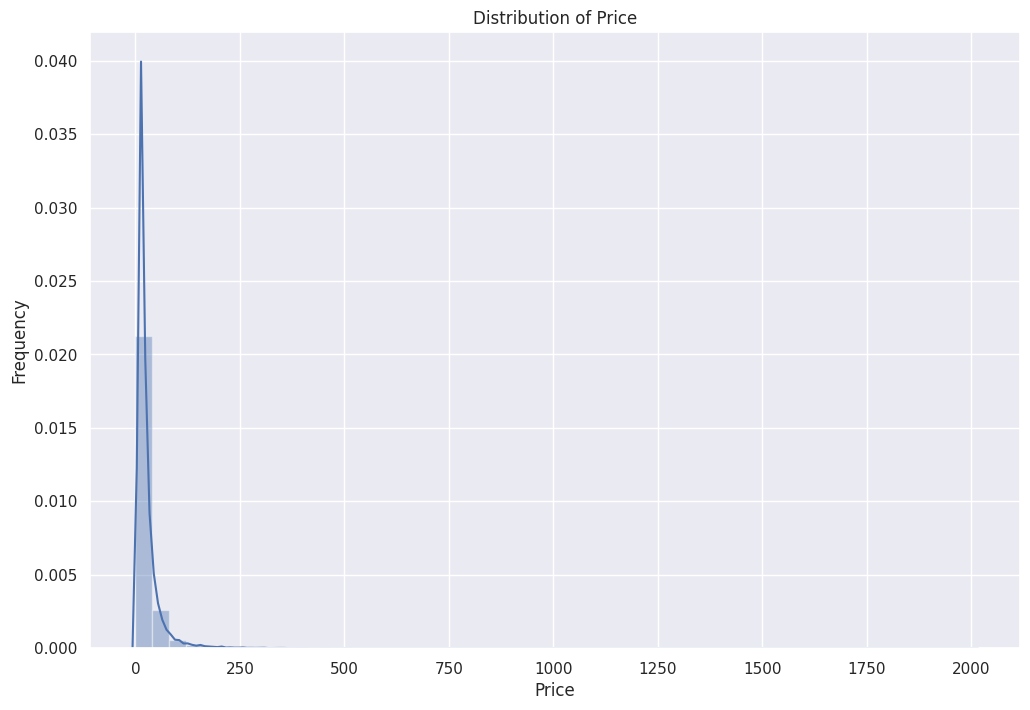

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(df.price)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

There seems to be some outliers in the data on the upper side and there are products with price as 0. According to Mercari Pricing tips - Items can be priced between 3 - 2,000.

In [ ]:
print('Number of products with price greater than $2000 -', df['price'][df['price'] > 2000].count())

Number of products with price greater than $2000 - 3


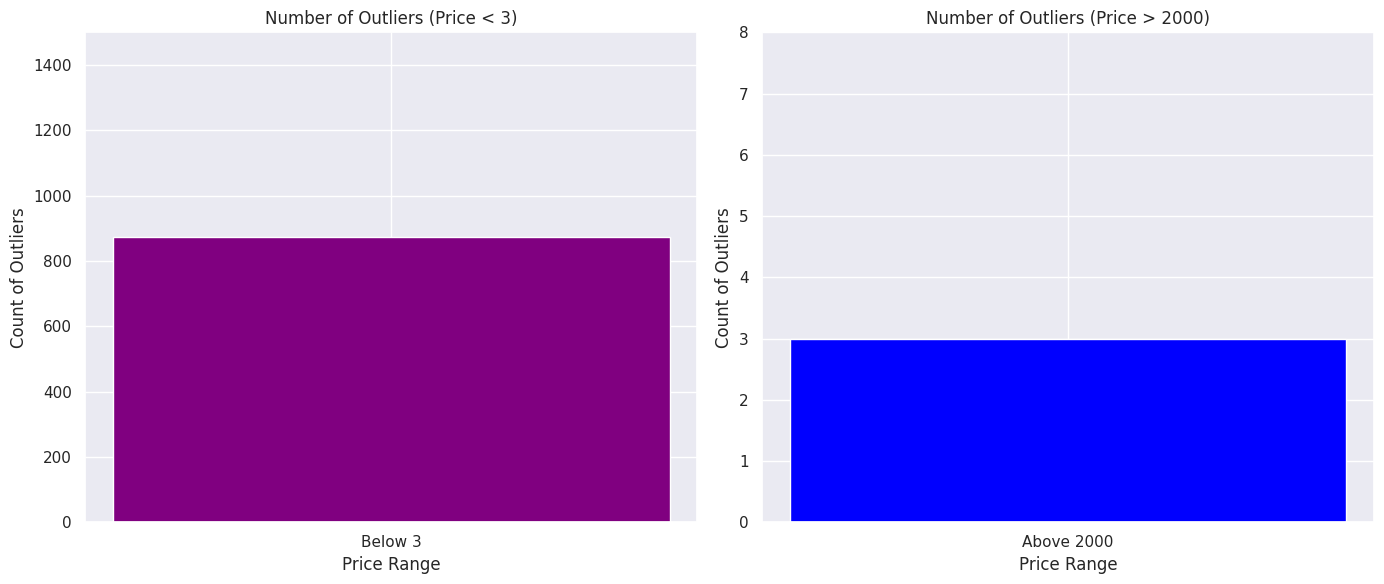

In [ ]:
import matplotlib.pyplot as plt

# Count the number of values less than 3 and greater than 2000
below_3 = len(df[df['price'] < 3])
above_2000 = len(df[df['price'] > 2000])

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for values below 3
axes[0].bar(['Below 3'], [below_3], color='purple')
axes[0].set_xlabel('Price Range')
axes[0].set_ylabel('Count of Outliers')
axes[0].set_title('Number of Outliers (Price < 3)')
axes[0].set_ylim(0, 1500)  # Set y-axis from 0 to 1000 for better clarity

# Bar plot for values above 2000
axes[1].bar(['Above 2000'], [above_2000], color='blue')
axes[1].set_xlabel('Price Range')
axes[1].set_ylabel('Count of Outliers')
axes[1].set_title('Number of Outliers (Price > 2000)')
axes[1].set_ylim(0, 8)  # Set y-axis from 0 to 5 for better clarity

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
df = df[(df.price >= 3) & (df.price <= 2000)]

In [ ]:
# Count rows before filtering
print("Rows before filtering:", len(df))

# Apply filtering
filtered_df = df[(df['price'] >= 3) & (df['price'] <= 2000)]

# Count rows after filtering
print("Rows after filtering:", len(filtered_df))


Rows before filtering: 1481658
Rows after filtering: 1481658


We removed all the rows (i.e 877) where price is less than \\$3 and greater than \$2000.

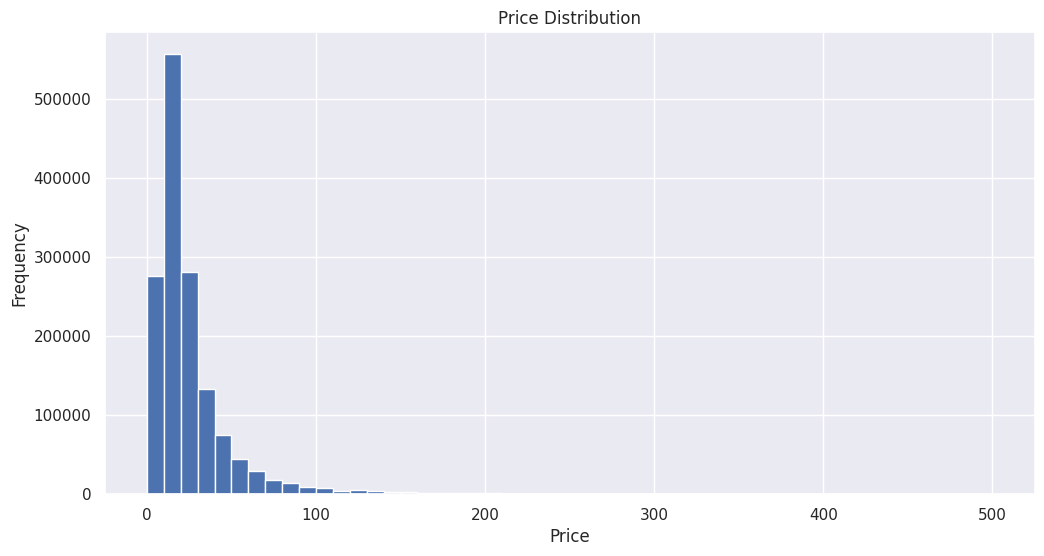

In [ ]:
df['price'].plot.hist(bins= 50, figsize=(12,6), edgecolor='white', range=[0,500])
plt.title('Price Distribution', fontsize=12)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

We can see Price distribution is positively skewed. Then, We have taken the logarithm to check if the Log(price) is normally distributed or not.

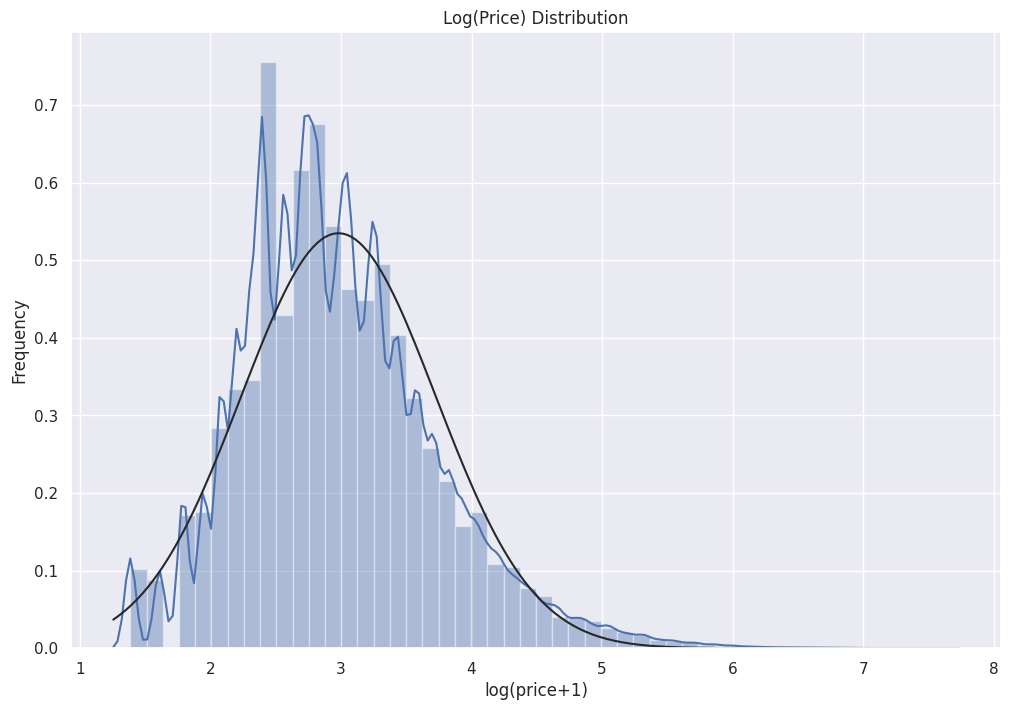

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(np.log1p(df['price']), bins=50, kde=True, fit=norm)
plt.title('Log(Price) Distribution', fontsize=12)
plt.xlabel('log(price+1)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

After taking logarithm of Price (Target variable), it seems to be almost normally distributed.

In [ ]:
df.price.describe(percentiles = [0.8,0.9, 0.95, 0.99]).astype(int)

,price
count,1481658
mean,26
std,38
min,3
50%,17
80%,34
90%,51
95%,75
99%,170
max,2000


Insights:
- Median price is $17

- 95% of the items are priced below $75

- 99% of the items are priced below $170

- 1% of the products might be outliers or some expensive products


Creating a new feature - log(price)

In [ ]:
df['log_price'] = np.log1p(df['price'])

### Univariate and Multivariate Analysis

### Shipping

In [ ]:
df['shipping'].value_counts()

,count
shipping,
0,818873
1,662785


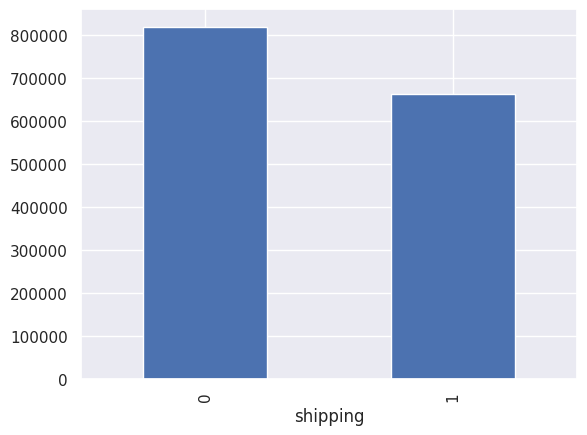

In [ ]:
import matplotlib.pyplot as plt

df['shipping'].value_counts().plot(kind='bar')
plt.show()

shipping equals '0' means the buyer pays for shipping.

shipping equals '1' means the seller pays for shipping.

Here,Count of products with shipping equals 0 (means shipping fee which is paid by buyer) is greater than shipping equals 1.

Relationship Between Price and Shipping column

In [ ]:
shipping_buyer = df[df['shipping'] == 0]['price']
shipping_seller = df[df['shipping'] == 1]['price']

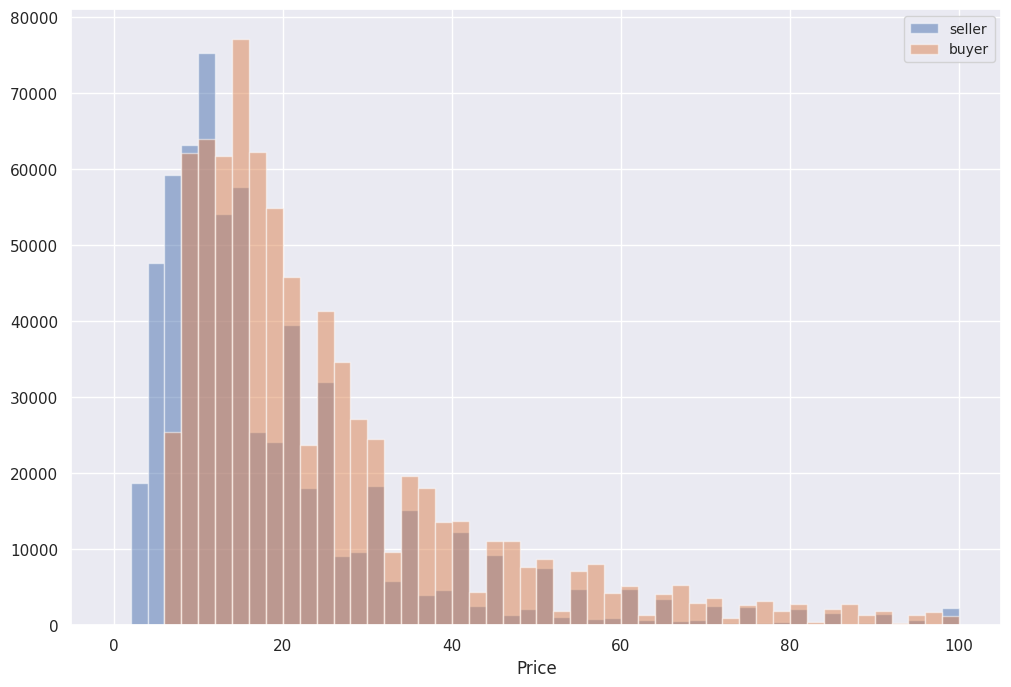

In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(shipping_seller, alpha=0.5, bins=50, range=[0,100], label='seller')
plt.hist(shipping_buyer, alpha=0.5, bins=50, range=[0,100], label='buyer')
plt.xlabel('Price')
plt.legend(fontsize = 10)
plt.show()

Insights:
- The above histogram shows a relationship between who pays for shipping and the price of an item.
- The histograms are partially overlapping, meaning there's a range of prices where both buyers and sellers pay for shipping.
- We can see that buyers might be paying more when they are responsible for shipping costs.

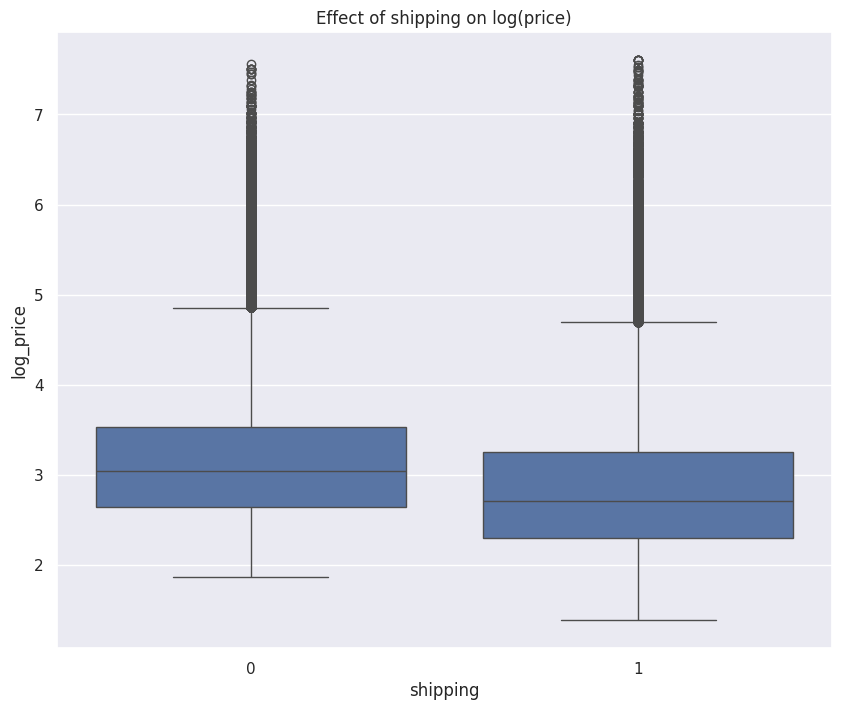

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='shipping', y='log_price', data=df)
plt.title('Effect of shipping on log(price)')
plt.show()

The box plot shows that the price of products are a bit more higher when the shipping is paid by the buyer compared to when it is paid by the seller.


### Brand

In [ ]:
df.brand_name.isnull().sum()

632336

There are 632336 products that do not have brand name present

In [ ]:
brand_counts = df.brand_name.value_counts()

In [ ]:
top_n = 10
top_brands = brand_counts.head(top_n)
print(top_brands)

brand_name
PINK                 54072
Nike                 54006
Victoria's Secret    48011
LuLaRoe              30995
Apple                17314
FOREVER 21           15178
Nintendo             14998
Lululemon            14550
Michael Kors         13916
American Eagle       13245
Name: count, dtype: int64


Pie chart

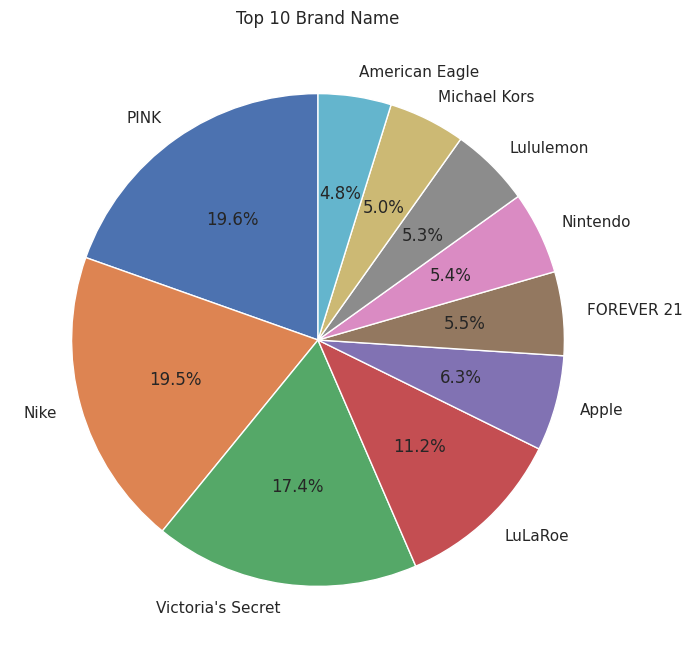

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(top_brands, labels=top_brands.index, autopct='%1.1f%%', startangle=90)
plt.title(f'Top {top_n} Brand Name')
plt.show()

Brand **Pink** is an top brand here followed by **Nike** and **Victoria Secret**.

In [ ]:
df['has_brand_name'] = (df['brand_name'].isna()).astype(np.int8) #if brand_name is present, 0 else 1

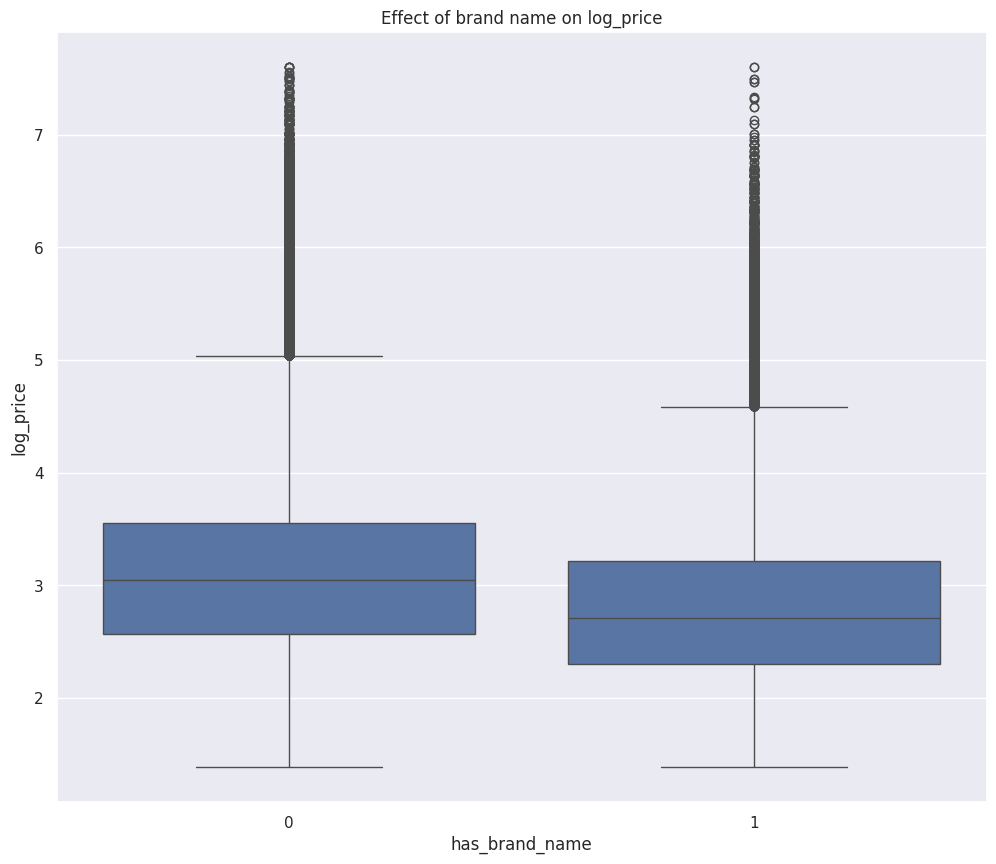

In [ ]:
plt.figure(figsize=(12, 10))
sns.boxplot(x='has_brand_name', y='log_price', data=df)
plt.title('Effect of brand name on log_price')
plt.show()

Insights:
- By comparing the boxes for items with and without a brand name, we can see how the presence of a brand name affects the price distribution.
- Here,The median price of products with missing brand names is lower than products having brand name.

Unique Brands

In [ ]:
unique_brand_count = df['brand_name'].nunique()
print(unique_brand_count)

4807


There are 4807 unique brand name in the dataset.


Expensive Brands

In [ ]:
data = df.where(df['price'] > 100).sort_values(by=['price'], ascending=False)

brands = data.groupby('brand_name')['price'].agg(['count', 'mean']).sort_values(by=['count'], ascending=False).reset_index()

expensive_brands = brands[:20]

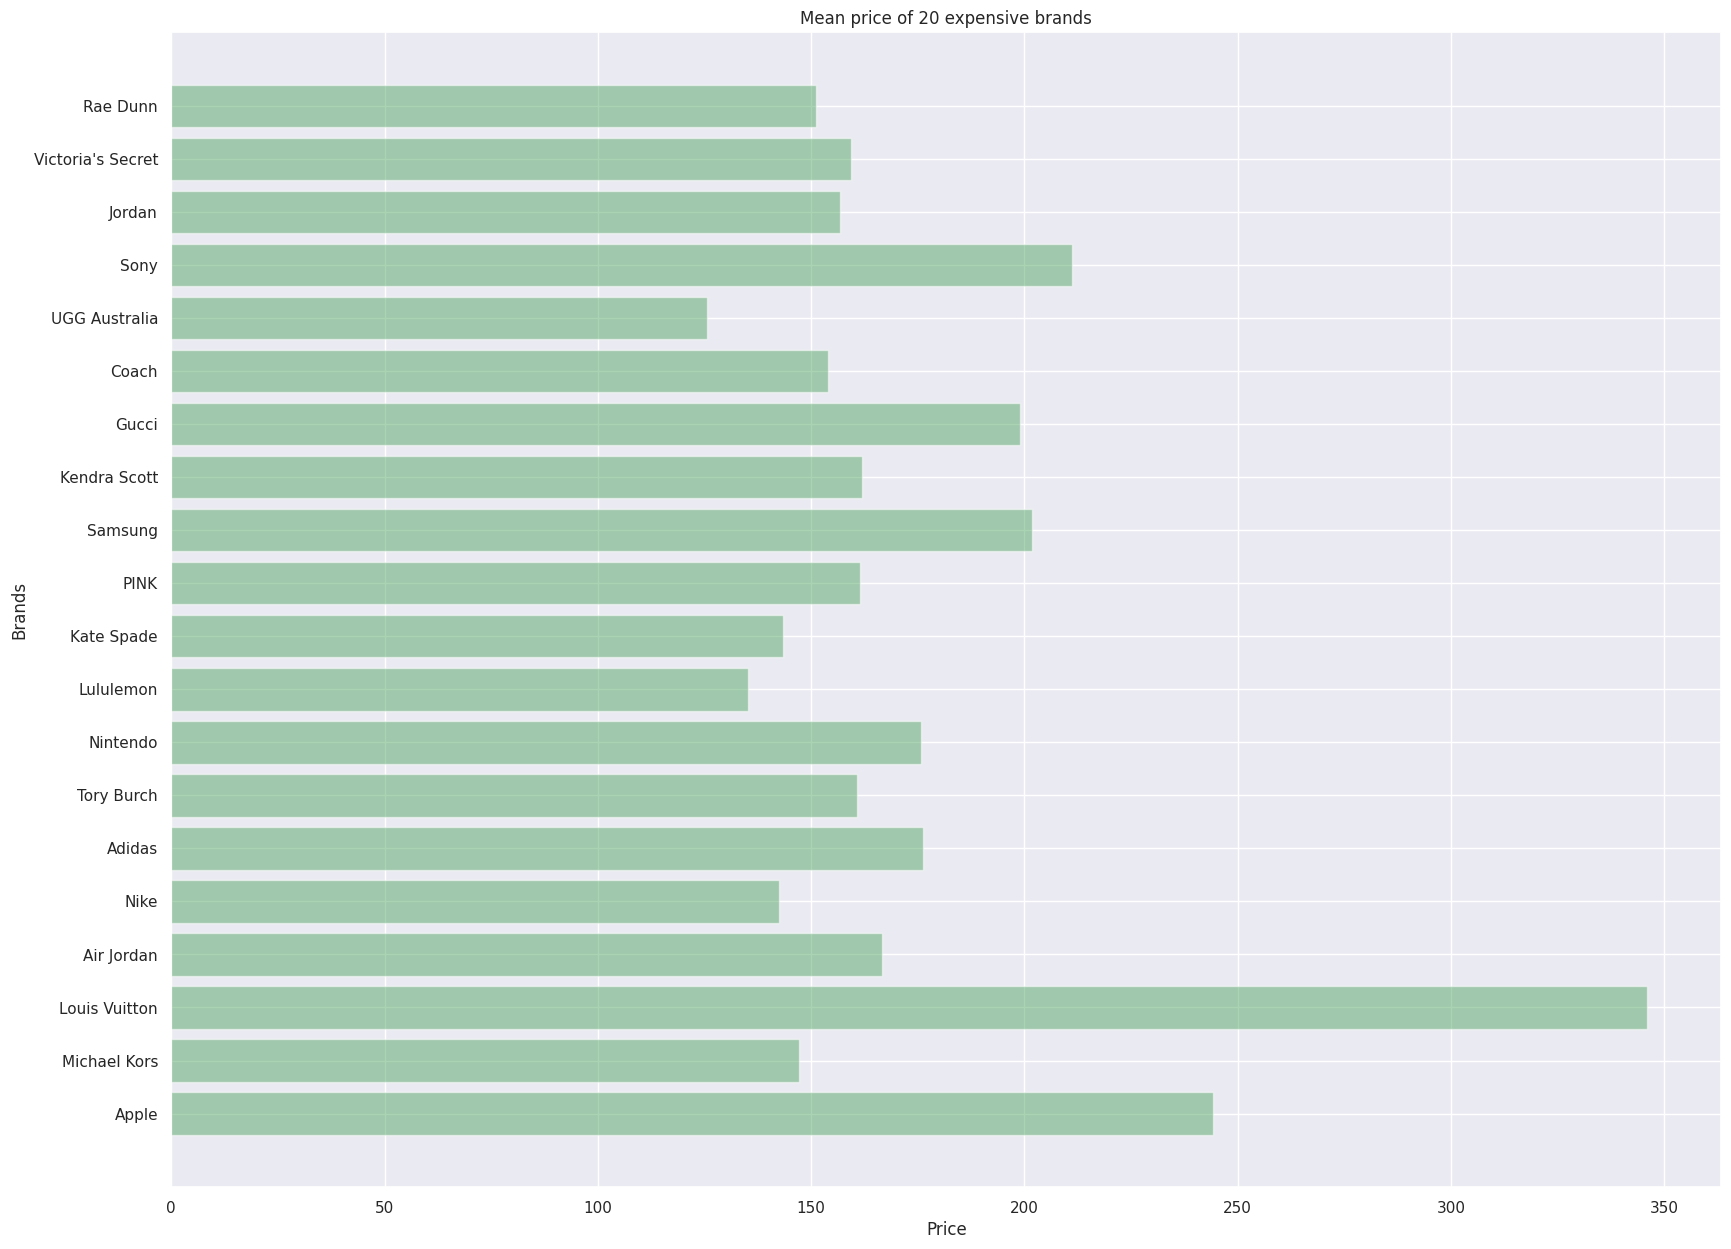

In [ ]:
plt.figure(figsize=(20, 15))

plt.barh(range(0,len(expensive_brands)), expensive_brands['mean'], align='center', alpha=0.5, color='g')

plt.yticks(range(0,len(expensive_brands)), expensive_brands['brand_name'])
plt.xticks()
plt.title('Mean price of 20 expensive brands')
plt.xlabel('Price')
plt.ylabel('Brands')
plt.show()

These brands have products which are expensive (or over $100)

Luxurious Brands

In [ ]:
data = df.where(df['price'] > 1000).sort_values(by=['price'], ascending=False)

brands = data.groupby('brand_name')['price'].agg(['count', 'mean']).sort_values(by=['count'], ascending=False).reset_index()

luxurious_brands = brands[:20]

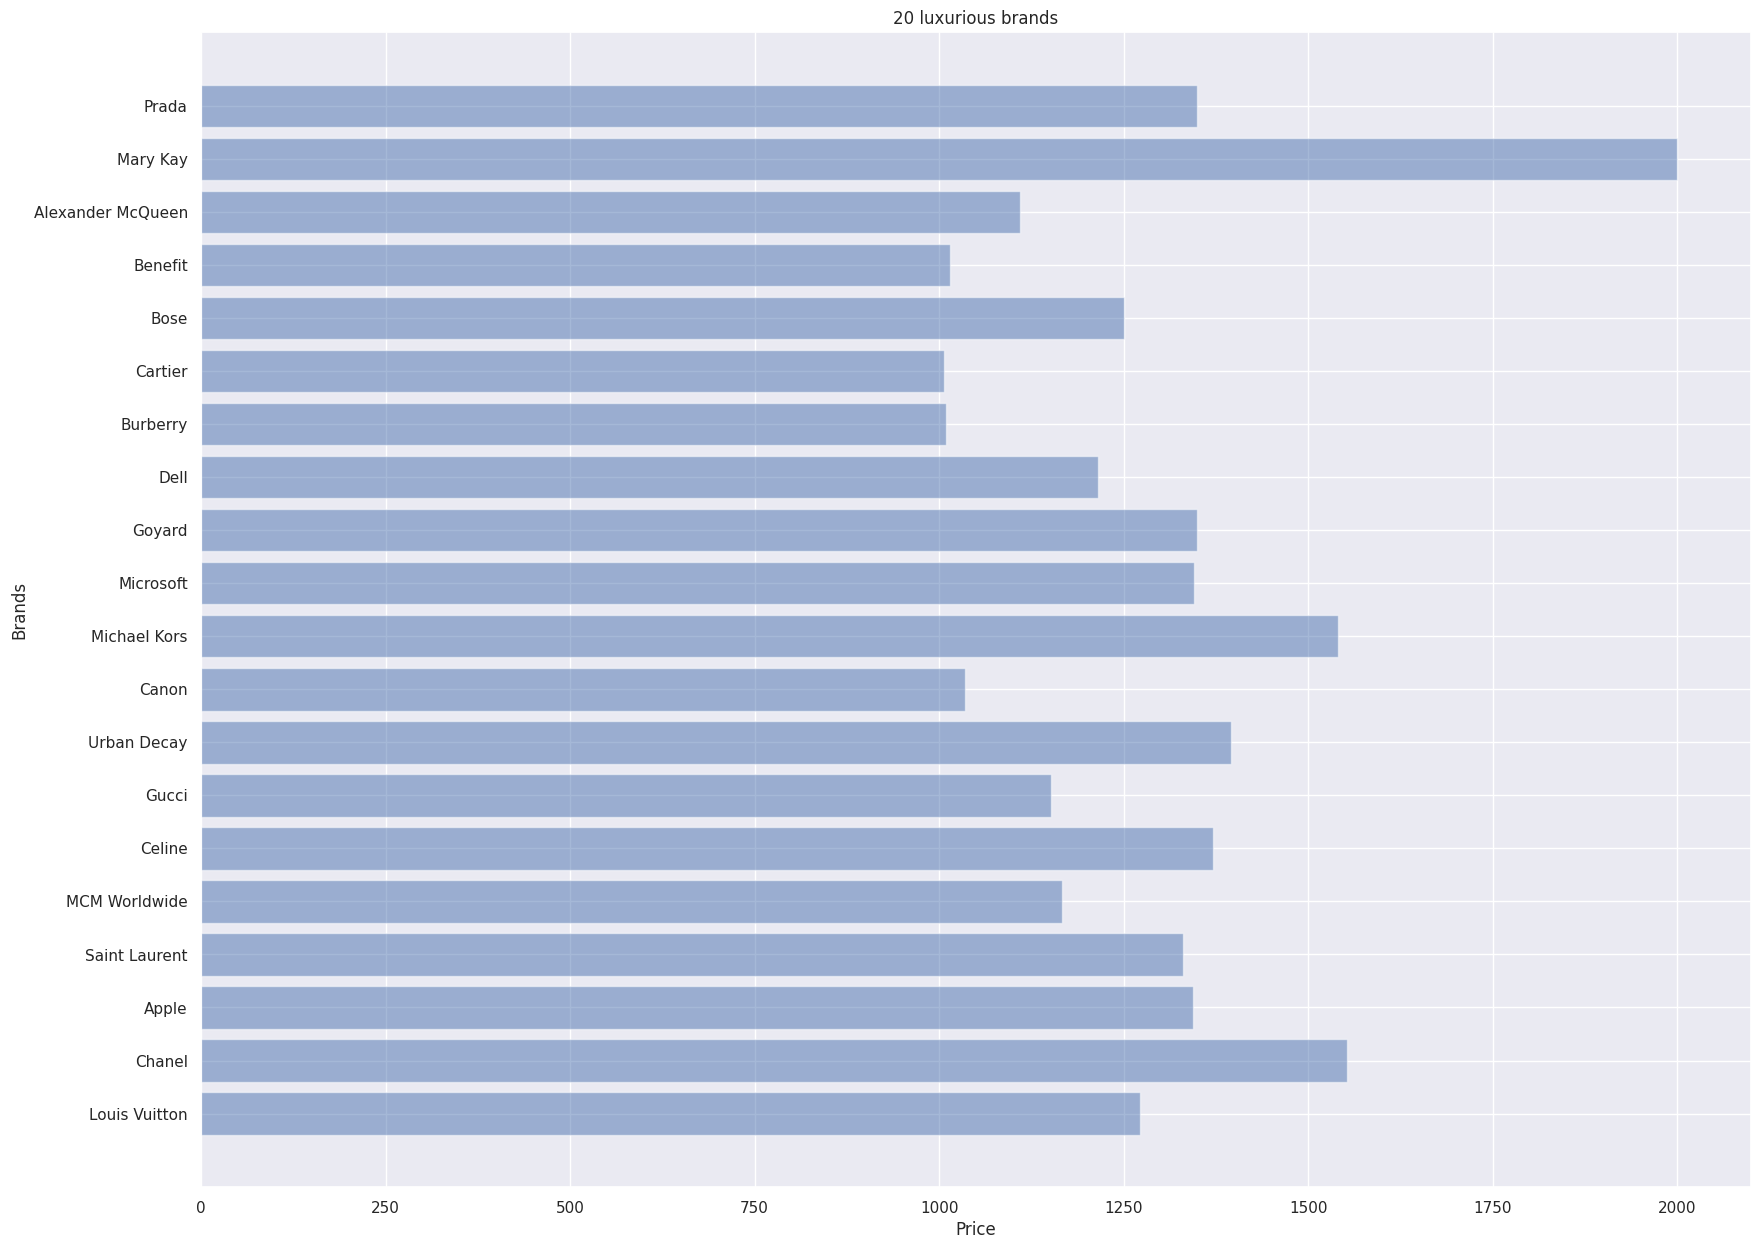

In [ ]:
plt.figure(figsize=(20, 15))

plt.barh(range(0,len(luxurious_brands)), luxurious_brands['mean'], align='center', alpha=0.5, color='b')

plt.yticks(range(0,len(luxurious_brands)), luxurious_brands['brand_name'])
plt.xticks()
plt.title('20 luxurious brands')
plt.xlabel('Price')
plt.ylabel('Brands')
plt.show()

These brands have products which are luxurious (or over $1000)

Cheap Brands

In [ ]:
data = df.where(df['price'] < 50).sort_values(by=['price'], ascending=False)

brands = data.groupby('brand_name')['price'].agg(['count', 'mean']).sort_values(by=['count'], ascending=False).reset_index()

cheap_brands = brands[:10]

In [ ]:
cheap_brands

,brand_name,count,mean
0,PINK,49441,21.320190
1,Nike,45201,21.777859
2,Victoria's Secret,45100,19.754091
3,LuLaRoe,26512,27.682125
4,FOREVER 21,15140,12.790885
5,American Eagle,13142,15.565858
6,Nintendo,12464,19.904565
7,Apple,11596,16.732149
8,Sephora,11427,17.870263
9,Bath & Body Works,10035,16.023019


Amongst the top selling 10 brands, it seems that products of these brands are not expensive.

### Product Category

In [ ]:
df.category_name.isna().sum()

6314

In [ ]:
df.category_name.describe()

,category_name
count,1475344
unique,1287
top,"Women/Athletic Apparel/Pants, Tights, Leggings"
freq,60152


In [ ]:
df.category_name.value_counts()[0:10]

,count
category_name,
"Women/Athletic Apparel/Pants, Tights, Leggings",60152
Women/Tops & Blouses/T-Shirts,46349
Beauty/Makeup/Face,34320
Beauty/Makeup/Lips,29901
Electronics/Video Games & Consoles/Games,26547
Beauty/Makeup/Eyes,25200
"Electronics/Cell Phones & Accessories/Cases, Covers & Skins",24668
Women/Underwear/Bras,21254
"Women/Tops & Blouses/Tank, Cami",20270


- There are 2 sub-categories under the category_name

In [ ]:
df[['category_1','category_2','category_3','category_4','category_5']] = df['category_name'].str.split('/', expand=True)
df.head(3)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,log_price,has_brand_name,category_1,category_2,category_3,category_4,category_5
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,2.397895,1,Men,Tops,T-shirts,None,None
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292,0,Electronics,Computers & Tablets,Components & Parts,None,None
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895,0,Women,Tops & Blouses,Blouse,None,None


In [ ]:
print('There are {} unique values in category_1'.format(len(df['category_1'].unique())))
print('There are {} unique values in category_2'.format(len(df['category_2'].unique())))
print('There are {} unique values in category_3'.format(len(df['category_3'].unique())))

There are 11 unique values in category_1
There are 114 unique values in category_2
There are 871 unique values in category_3


Unique Catogory

In [ ]:
unique_categories = df['category_name'].unique()

print(f"Number of unique categories: {len(unique_categories)}")

Number of unique categories: 1288


Main Category

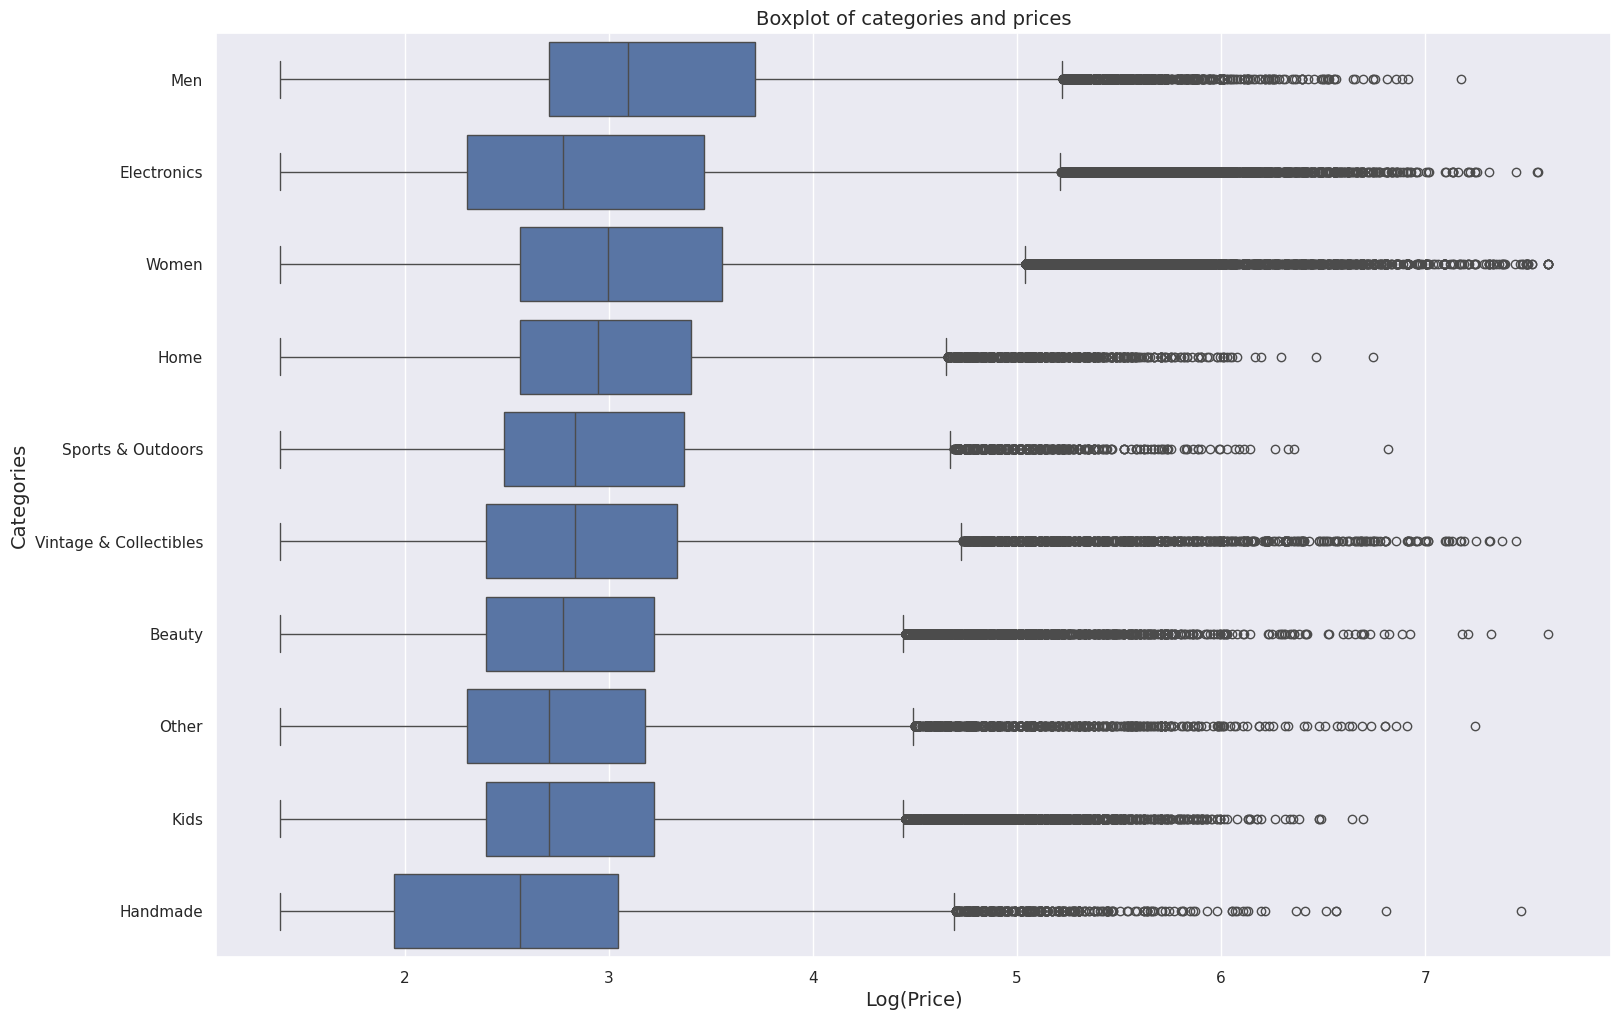

In [ ]:
plt.figure(figsize=(18,12))
sns.boxplot(x = 'log_price', y = 'category_1', data = df, orient = 'h')
plt.title('Boxplot of categories and prices', fontsize=14)
plt.xlabel('Log(Price)', fontsize=14)
plt.ylabel('Categories', fontsize=14)
plt.show()

Insights:

- It shows the price ranges of items in different categories.
- Prices of products from Handmade category are generally less than other categories.
- Categories such as Men/Women have higher median prices because of some expensive brands

First Subcategory

In [ ]:
cat_mean = df.groupby('category_2')['price'].agg(['mean']).sort_values(by=['mean'], ascending = False).reset_index()[:20]

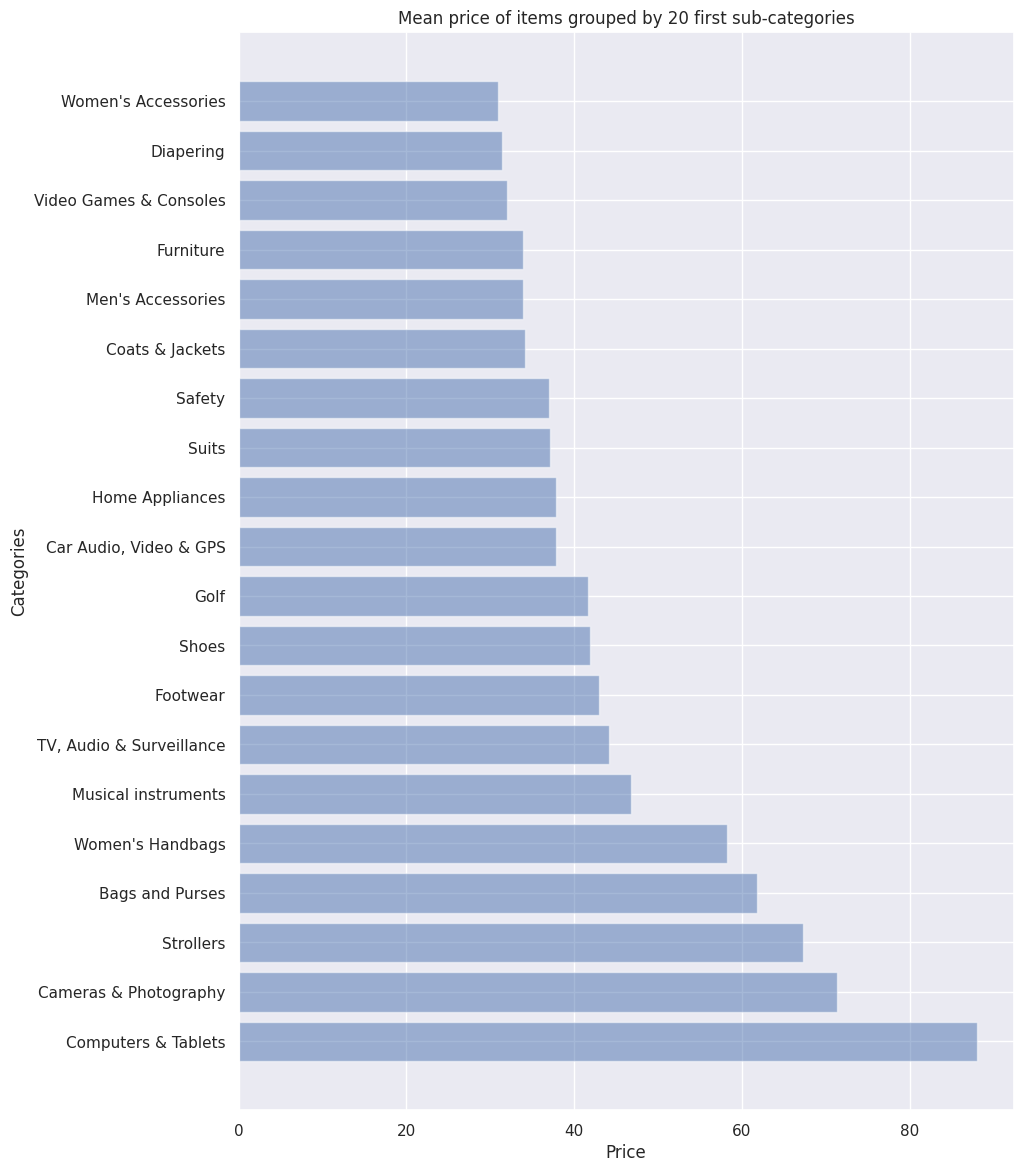

In [ ]:
plt.figure(figsize=(10, 14))

plt.barh(range(0,len(cat_mean)), cat_mean['mean'], align='center', alpha=0.5, color='b')

plt.yticks(range(0,len(cat_mean)), cat_mean['category_2'])
plt.xticks()
plt.title('Mean price of items grouped by 20 first sub-categories')
plt.xlabel('Price')
plt.ylabel('Categories')
plt.show()

This bar plot helps us to visualise which sub-categories have higher or lower average prices.
Here, `Computers & Tablets`,`Cameras & Photography` have higher average prices as compared to `Women and Men Accesories`.

Second Subcategory

In [ ]:
sub_cat_mean = df.groupby('category_3')['price'].agg(['mean']).sort_values(by=['mean'], ascending = False).reset_index()[:20]

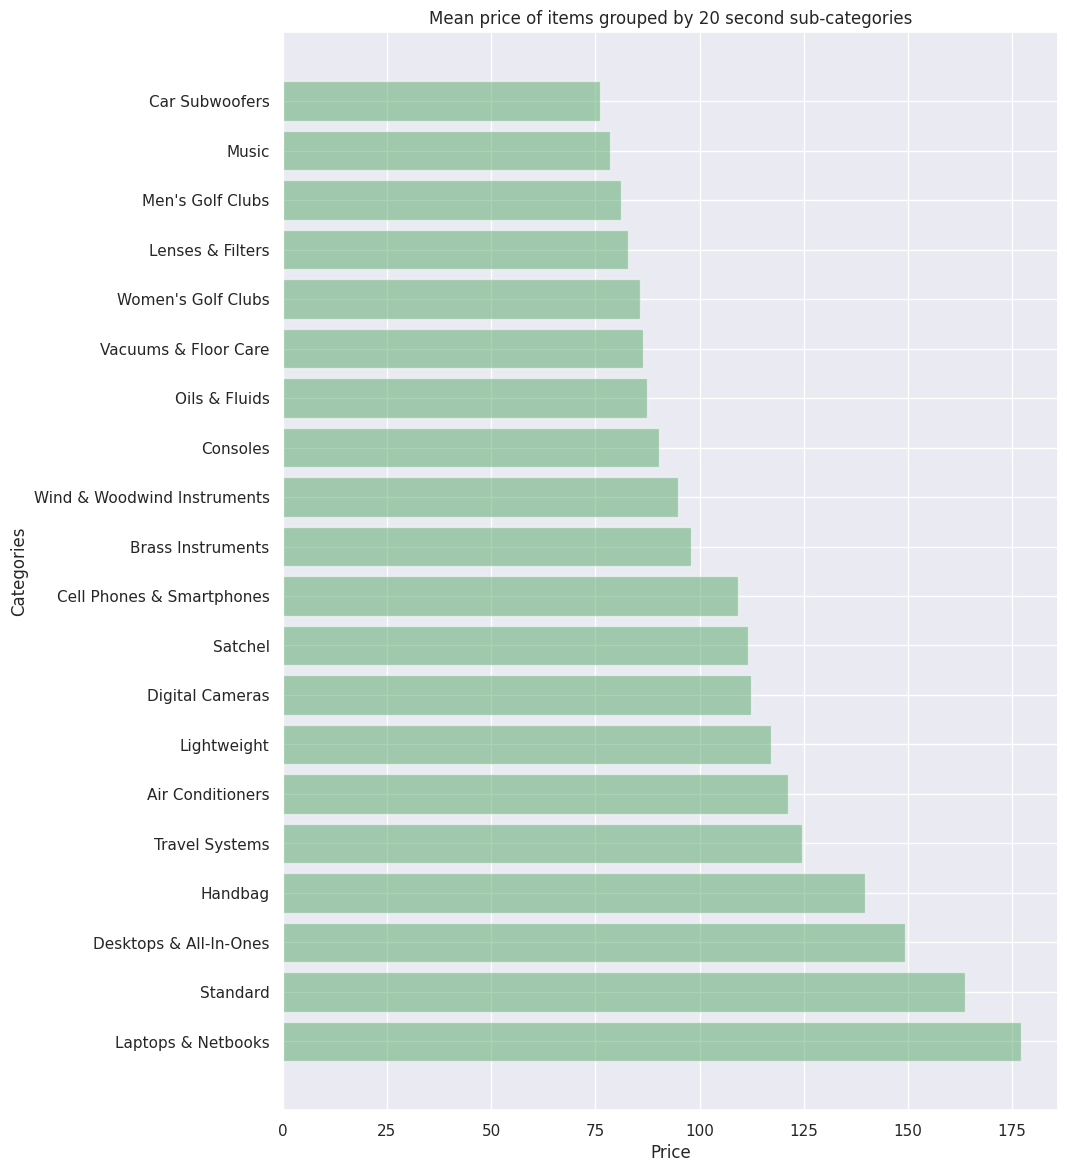

In [ ]:
plt.figure(figsize=(10, 14))

plt.barh(range(0,len(sub_cat_mean)), sub_cat_mean['mean'], align='center', alpha=0.5, color='g')

plt.yticks(range(0,len(sub_cat_mean)), sub_cat_mean['category_3'])
plt.xticks()
plt.title('Mean price of items grouped by 20 second sub-categories')
plt.xlabel('Price')
plt.ylabel('Categories')
plt.show()

### Item Condition

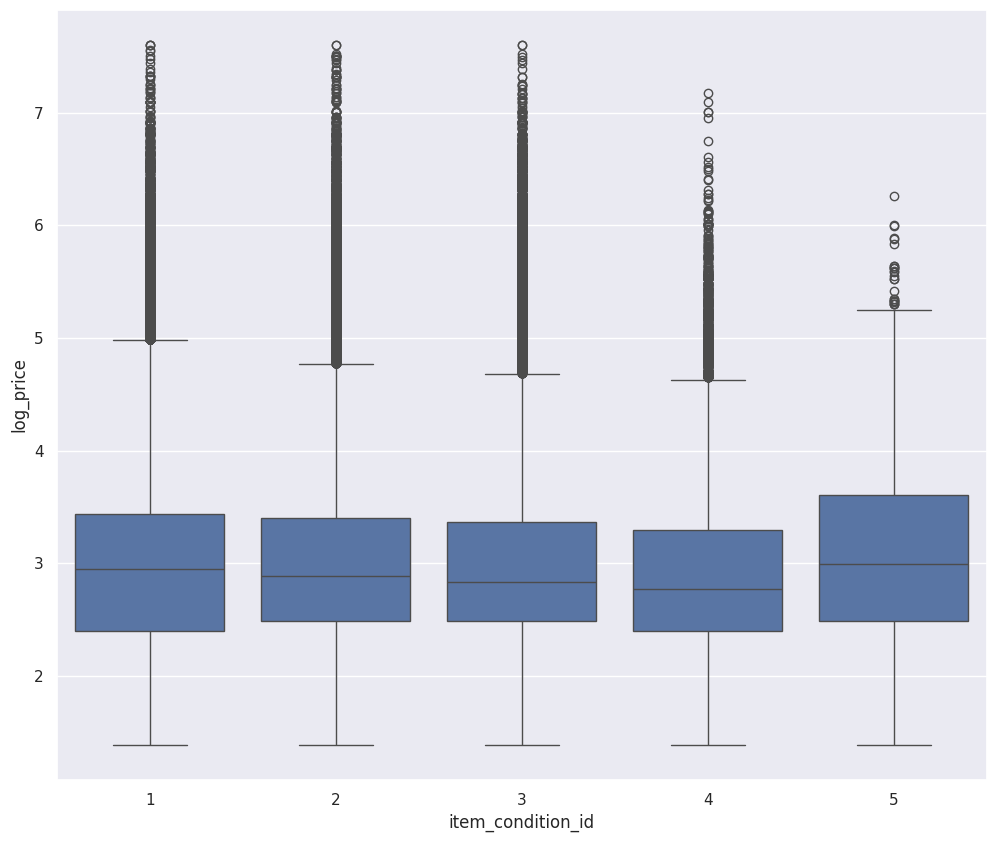

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.boxplot(x='item_condition_id', y='log_price', data=df)
plt.show()

By comparing the positions and shapes of the boxes, we can see how the price distribution changes across different item conditions.

Here, the median line is higher for item_condition_id 1 than for item_condition_id 3, it suggests that items in condition 1 tend to have higher prices than those in condition 3.

Items in better condition (lower item_condition_id) tend to have slightly higher prices, as expected.

In [ ]:
df.groupby('item_condition_id')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
item_condition_id,,,,,,,,
1,640244.0,26.493313,35.248302,3.0,10.0,18.0,30.00,2000.0
2,375195.0,27.578747,42.011105,3.0,11.0,17.0,29.00,2000.0
3,431892.0,26.557241,40.037663,3.0,11.0,16.0,28.00,2000.0
4,31945.0,24.362169,35.684218,3.0,10.0,15.0,26.00,1309.0
5,2382.0,31.730479,39.536983,3.0,11.0,19.0,35.75,522.0


- As per assumption, most sellers tend to give item_condition_id as 1 as buyers don't buy products which are not in great condition.
- Median price of products with item_condition_id of 5 (or poor) is greater than the items with good condition.
- Also products which are rated as 5 are also priced similar to those with 1.
- 43% products are marked as with item condition of 1 and only 0.1% are marked as 5.


**Model Building**

In [ ]:
!pip install xgboost

In [ ]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')

#numpy and pandas for data manipulation
import pandas as pd
import numpy as np
from numpy import median
from scipy.stats import norm
import re
import math

#matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set(style='darkgrid')

import plotly
from plotly.offline import iplot
import plotly.graph_objects as go
# from wordcloud import WordCloud

#file system management
import os

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
seed = 42

from sklearn import preprocessing
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import GridSearchCV
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


import xgboost as xgb
from xgboost import XGBRegressor
# from sklearn.linear_model import Ridge
# from lightgbm import LGBMRegressor
# import joblib

import keras
import tensorflow as tf
from keras import optimizers, callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Model
from keras.layers import Input, Dropout, Dense


## Preprocessing Data

**Defining Functions**

In [ ]:
#stopwords without no, not, etc
STOPWORDS = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [ ]:
def handle_missing_values(input_data):
    """
    Fills the nan/missing values with 'missing' for text columns
    """
    input_data.fillna({'name': 'NoName', 'item_description': 'NoDescription','brand_name': 'unknown'}, inplace=True)

    return input_data

In [ ]:
def remove_emoji(sentence):
    """
    Remove emojis from the string
    """
    pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

    return pattern.sub(r'', sentence)

In [ ]:
def remove_punctuation(sentence):
    """
    Remove all puntuations from the string
    """
    import string
    regular_punct = list(string.punctuation)

    for punc in regular_punct:
        if punc in sentence:
            sentence = sentence.replace(punc, ' ')

    return sentence.strip()

In [ ]:
def decontracted(phrase):
    """
    Expand and create common english contractions in the text
    """
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)

    return phrase

In [ ]:
def process_text(input_data, cols):
    """
    Take the text columns and process the data. Expand contractions, use regex to remove symbols/numbers, remove emojis, punctuations
    and stopwords and convert text to lowercase
    """
    for col in cols:

        processed_data = []

        for sent in input_data[col].values:

            sent = decontracted(sent)
            sent = sent.replace('\\r', ' ')
            sent = sent.replace('\\"', ' ')
            sent = sent.replace('\\n', ' ')
            sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
            sent = remove_emoji(sent)
            sent = remove_punctuation(sent)
            sent = ' '.join(e for e in sent.split() if e not in STOPWORDS)
            processed_data.append(sent.lower().strip())

        input_data[col] = processed_data

    return input_data

In [ ]:
def process_category(input_data):
    """
    Split the category_name into 3 parts as category_0, category_1 and category_2
    """
    for i in range(3):

        def get_categories(ele):

            if type(ele) != str:
                return np.nan

            cat = ele.split('/')

            if i >= len(cat):
                return np.nan
            else:
                return cat[i]

        col_name = 'category_' + str(i)

        input_data[col_name] = input_data['category_name'].apply(get_categories)

        input_data.fillna({'category_name': 'Other'}, inplace = True)

    return input_data

In [ ]:
def get_text_features(input_data):
    """
    NLP features derived from the text columns
    """
    input_data['has_brand_name'] = (input_data['brand_name'].isnull()).astype(np.int8) #if brand_name is present, 1 else 0

    input_data['has_price'] = np.where(input_data['item_description'].str.contains(' rm ', na = False), 1, 0) #if item_description has [rm] which is price string removed, 1 else 0

    input_data['reversed_item_condition_id'] = 5 - input_data['item_condition_id']

    input_data['is_luxurious'] = (input_data['brand_name'].isin(luxurious_brands['brand_name'])).astype(np.int8)

    input_data['is_expensive'] = (input_data['brand_name'].isin(expensive_brands['brand_name'])).astype(np.int8)

    input_data['is_cheap'] = (input_data['brand_name'].isin(cheap_brands['brand_name'])).astype(np.int8)

    input_data['len_name'] = input_data['name'].str.len()
    input_data['len_item_description'] = input_data['item_description'].str.len()
    input_data['len'] = input_data['len_name'] + input_data['len_item_description']

    input_data['token_count_name'] = input_data['name'].apply(lambda x: len(x.split(' ')))
    input_data['token_count_item_description'] = input_data['item_description'].apply(lambda x: len(x.split(' ')))
    input_data['token_count'] = input_data['token_count_name'] + input_data['token_count_item_description']
    input_data['token_count_ratio'] = input_data['token_count_name']/input_data['token_count_item_description']

    input_data["name_words"] = input_data["name"].str.count("(\s|^)[a-z]+(\s|$)")
    input_data["item_description_words"] = input_data["item_description"].str.count("(\s|^)[a-z]+(\s|$)")
    input_data["words"] = input_data["name_words"] + input_data["item_description_words"]

    input_data["name_numbers"] = input_data["name"].str.count("(\s|^)[-+]?[0-9]*\.?[0-9]+([eE][-+]?[0-9]+)?(\s|$)")
    input_data["item_description_numbers"] = input_data["item_description"].str.count("(\s|^)[-+]?[0-9]*\.?[0-9]+([eE][-+]?[0-9]+)?(\s|$)")
    input_data["numbers"] = input_data["name_numbers"] + input_data["item_description_numbers"]

    input_data["name_letters"] = input_data["name"].str.count("[a-zA-Z]")
    input_data["item_description_letters"] = input_data["item_description"].str.count("[a-zA-Z]")
    input_data["letters"] = input_data["name_letters"] + input_data["item_description_letters"]

    input_data["name_digits"] = input_data["name"].str.count("[0-9]")
    input_data["item_description_digits"] = input_data["item_description"].str.count("[0-9]")
    input_data["digits"] = input_data["name_digits"] + input_data["item_description_digits"]

    return input_data

In [ ]:
def preprocess(input_data):
    """
    Process the data by handling missing values, process category_name, process text
    """
    input_data = input_data[(input_data['price'] >= 3) & (input_data['price'] <= 2000)]

    input_data['price'] = np.log1p(input_data['price'])

    input_data = handle_missing_values(input_data)

    input_data = process_category(input_data)

    input_data = process_text(input_data, ['name', 'item_description', 'category_name'])

    return input_data

### **Sampling**

I performed sampling because the dataset contained 2.2 million rows, which caused RAM to crash during deep learning operations.

**10% Data Sampling**

In [ ]:
import pandas as pd

data = df.sample(frac=0.1, random_state=42)

## **Process**

In [ ]:
data = preprocess(data)

data.fillna({'category_0': 'other', 'category_1': 'other', 'category_2': 'other'}, inplace = True)

In [ ]:
data = get_text_features(data)

data.fillna({'brand_name': 'unknown'}, inplace = True)

#concatenate text features
data['name'] = data['brand_name'] + ' ' + data['category_name']
data['text'] = data['name'] + ' ' + data['item_description']

#data = data.drop(columns = ['brand_name', 'item_description', 'category_name'], axis = 1)

## Modelling

In [ ]:
"""
Taking necessary features for modeling
"""
data = data[['price', 'name', 'category_0', 'category_1',
       'category_2', 'shipping', 'item_condition_id', 'is_expensive', 'is_luxurious', 'has_brand_name', 'text']]

**Train Test Split**

**Pareto ratio (80:20)**

In [ ]:
# Split the sampled data into features (X) and target (y)
y = data['price']
X = data.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = seed)


In [ ]:
print('--Train and Test--')
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

--Train and Test--
(140757, 10) (140757,)
(7409, 10) (7409,)


In [ ]:
#one hot encoding of category names
def get_ohe(X_train, X_test, col_name):
    """
    Get one hot encoded features
    """
    vect = CountVectorizer()
    tr_ohe = vect.fit_transform(X_train[col_name].values)
    te_ohe = vect.transform(X_test[col_name].values)

    return tr_ohe, te_ohe

In [ ]:
#tfidf word embeddings
def get_text_encodings(X_train, X_test, col_name, min_val, max_val):
    """
    Get TFIDF encodings with max_features capped at 1M
    """
    vect = TfidfVectorizer(min_df = 10, ngram_range = (min_val, max_val), max_features = 1000000)
    tr_text = vect.fit_transform(X_train[col_name].values)
    te_text = vect.transform(X_test[col_name].values)

    return tr_text, te_text

In [ ]:
def generate_encodings(X_train, X_test):
    """
    Get encodings for all the features. Scale and normalize the numerical features. Stack the encoded features horizontally.
    """
    tr_ohe_category_0, te_ohe_category_0 = get_ohe(X_train, X_test, 'category_0')
    tr_ohe_category_1, te_ohe_category_1 = get_ohe(X_train, X_test, 'category_1')
    tr_ohe_category_2, te_ohe_category_2 = get_ohe(X_train, X_test, 'category_2')

    tr_trans = csr_matrix(pd.get_dummies(X_train[['shipping', 'item_condition_id', 'is_expensive', 'is_luxurious']], sparse=True).values)
    te_trans = csr_matrix(pd.get_dummies(X_test[['shipping', 'item_condition_id', 'is_expensive', 'is_luxurious']], sparse=True).values)

    tr_name, te_name = get_text_encodings(X_train, X_test, 'name', 1, 1)
    tr_text, te_text = get_text_encodings(X_train, X_test, 'text', 1, 2)

    train_data = hstack((tr_ohe_category_0, tr_ohe_category_1, tr_ohe_category_2, tr_trans, \
                       tr_name, tr_text)).tocsr().astype('float32')


    test_data = hstack((te_ohe_category_0, te_ohe_category_1, te_ohe_category_2, te_trans, \
                       te_name, te_text)).tocsr().astype('float32')

    return train_data, test_data

In [ ]:
"""
Generate encoding of all the features and print the final data matrix that will be the input for the ML models
"""
train_data, test_data = generate_encodings(X_train, X_test)

print('--Final Data Matrix--')
print(train_data.shape, y_train.shape)
print(test_data.shape, y_test.shape)

--Final Data Matrix--
(140757, 47002) (140757,)
(7409, 47002) (7409,)


In [ ]:
def get_rmsle(y_true, y_pred):
    """
    Get RMSLE score by passing actual values and the predictions from models
    """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# **Model building**

# **Machine Learning - xgboost**

In [ ]:

# xgb_model = xgb.XGBRegressor()
# xgb_model.fit(train_data, y_train)

# predictions = xgb_model.predict(train_data)
# train_score = get_rmsle(np.expm1(y_train), np.expm1(predictions))
# print('Train rmsle explained: ', train_score)

# predictions = xgb_model.predict(test_data)
# test_score = get_rmsle(np.expm1(y_test), np.expm1(predictions))
# print('Test rmsle explained: ', test_score)

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def get_rmsle(y_true, y_pred, epsilon=1e-15):
    """Calculate RMSLE score"""
    return np.sqrt(np.mean((np.log1p(y_pred + epsilon) - np.log1p(y_true + epsilon)) ** 2))

def evaluate_metrics(y_true, y_pred):
    """Calculate and return all evaluation metrics."""
    rmsle = get_rmsle(np.expm1(y_true), np.expm1(y_pred))
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # as a percentage
    r2 = r2_score(y_true, y_pred)

    return rmsle, rmse, mae, mape, r2

# Initialize and train the XGBRegressor
xgb_model = xgb.XGBRegressor()
xgb_model.fit(train_data, y_train)

# Predictions on the training data
train_predictions = xgb_model.predict(train_data)

# Calculate metrics for training data
train_rmsle, train_rmse, train_mae, train_mape, train_r2 = evaluate_metrics(y_train, train_predictions)

# Print training metrics
print('Training Metrics:')
print(f'RMSLE: {train_rmsle}')
print(f'RMSE: {train_rmse}')
print(f'MAE: {train_mae}')
print(f'MAPE: {train_mape}')
print(f'R²: {train_r2}')


Training Metrics:
RMSLE: 0.5121881168615912
RMSE: 0.5121881168595437
MAE: 0.3951724891081686
MAPE: 14.155808102558323
R²: 0.5296927668827549



Actual vs Predicted (first 10 values):
           Actual  Predicted
1187428  1.791759   2.380245
947114   3.258097   3.138775
171605   4.007333   2.860777
379387   3.218876   2.787460
1060631  2.302585   2.510197
295334   2.397895   2.799839
1086845  1.609438   2.388622
576739   2.995732   2.890533
673300   3.688879   3.449897
1158903  2.397895   2.942728


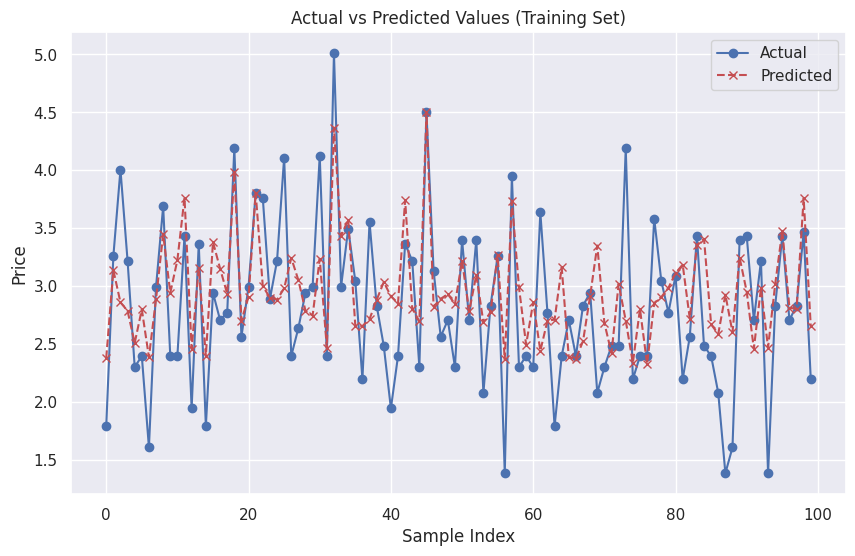

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

train_predictions = xgb_model.predict(train_data)
# Compare actual and predicted values (first 10 values)
comparison = pd.DataFrame({'Actual': y_train, 'Predicted': train_predictions})
print("\nActual vs Predicted (first 10 values):")
print(comparison.head(10))

# Plot Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_train.values[:100], label='Actual', marker='o', linestyle='-', color='b')  # Plot first 100 values for clarity
plt.plot(train_predictions[:100], label='Predicted', marker='x', linestyle='--', color='r')
plt.title('Actual vs Predicted Values (Training Set)')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


# **DeepLearning - LSTM Regression**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# def get_rmsle(y_true, y_pred):
#     """Calculate RMSLE score"""
#     return np.sqrt(np.mean(np.log1p(y_pred) - np.log1p(y_true)) ** 2)

def lstm_regr(X_train, y_train, X_test, y_test):
    # Scale the target variable
    y_scaler = StandardScaler()
    y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
    y_val = y_scaler.transform(y_test.values.reshape(-1, 1))

    # Convert sparse matrices to dense
    if hasattr(X_train, "toarray"):  # Check if X_train is a sparse matrix
        X_train = X_train.toarray()
    if hasattr(X_test, "toarray"):  # Check if X_test is a sparse matrix
        X_test = X_test.toarray()

    # Reshape input data to 3D for LSTM [samples, time steps, features]
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))  # 1 time step
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))      # 1 time step

    # Define LSTM model
    model_in = Input(shape=(X_train.shape[1], X_train.shape[2]), dtype='float32')
    out = LSTM(128, activation='relu', return_sequences=True)(model_in)
    out = Dropout(0.2)(out)
    out = LSTM(64, activation='relu')(out)
    out = Dropout(0.2)(out)
    model_out = Dense(1)(out)

    model = Model(model_in, model_out)

    # Compile the model
    model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

    model.summary()

    # Fit the model
    model.fit(X_train, y_train, batch_size=512, epochs=4, verbose=1, validation_data=(X_test, y_val))

    # Make predictions
    predictions = model.predict(X_test)[:, 0]

    # Inverse scale the predictions
    y_pred = y_scaler.inverse_transform(predictions.reshape(-1, 1))[:, 0]

    # Calculate evaluation metrics
    rmsle = get_rmsle(np.expm1(y_test.values), np.expm1(y_pred))
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # as a percentage
    r2 = r2_score(y_test, y_pred)

    return model, y_pred, rmsle, rmse, mae, mape, r2

# Example data preparation (assuming you have these defined)
# train_data, y_train, test_data, y_test should be defined before calling the function
regr, preds, rmsle, rmse, mae, mape, r2 = lstm_regr(train_data, y_train, test_data, y_test)

# Print all scores
print('RMSLE: ', rmsle)
print('RMSE: ', rmse)
print('MAE: ', mae)
print('MAPE: ', mape)
print('R²: ', r2)

# Save the model weights
regr.save_weights('model-lstm.weights.h5')


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1, 47002)]        0         
                                                                 
 lstm_4 (LSTM)               (None, 1, 128)            24131072  
                                                                 
 dropout_4 (Dropout)         (None, 1, 128)            0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 24180545 (92.24 MB)
Trainable params: 2418054

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1, 47002)]        0         
                                                                 
 lstm_6 (LSTM)               (None, 1, 128)            24131072  
                                                                 
 dropout_6 (Dropout)         (None, 1, 128)            0         
                                                                 
 lstm_7 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 24180545 (92.24 MB)
Trainable params: 2418054

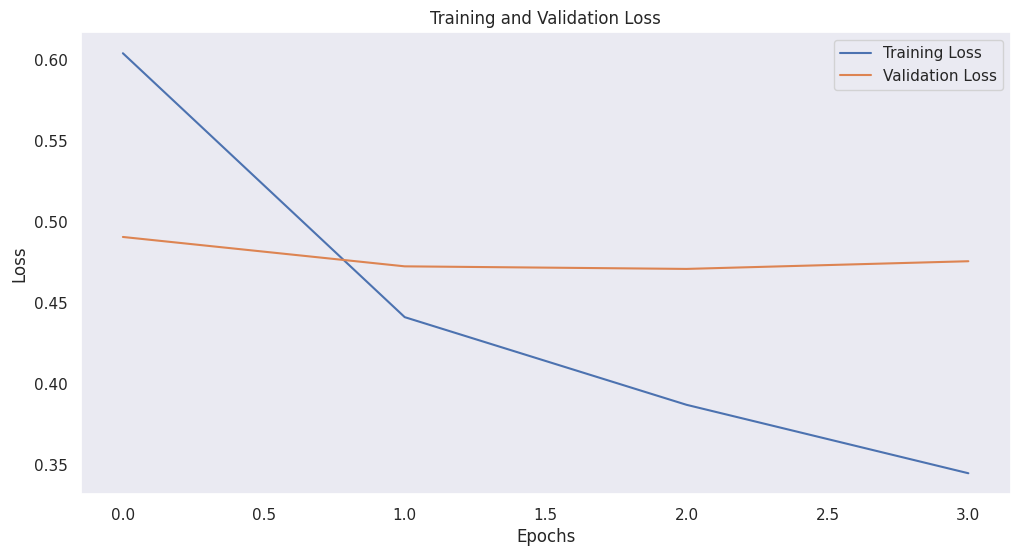

RMSLE:  0.5149914548014701
RMSE:  0.5149914548075244
MAE:  0.3909920296459422
MAPE:  13.821546463098416
R²:  0.5289497432150454


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

def get_rmsle(y_true, y_pred):
    """Calculate RMSLE score"""
    return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true)) ** 2))

def lstm_regr(X_train, y_train, X_test, y_test):
    # Scale the target variable
    y_scaler = StandardScaler()
    y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
    y_val = y_scaler.transform(y_test.values.reshape(-1, 1))

    # Convert sparse matrices to dense
    if hasattr(X_train, "toarray"):  # Check if X_train is a sparse matrix
        X_train = X_train.toarray()
    if hasattr(X_test, "toarray"):  # Check if X_test is a sparse matrix
        X_test = X_test.toarray()

    # Reshape input data to 3D for LSTM [samples, time steps, features]
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))  # 1 time step
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))      # 1 time step

    # Define LSTM model
    model_in = Input(shape=(X_train.shape[1], X_train.shape[2]), dtype='float32')
    out = LSTM(128, activation='relu', return_sequences=True)(model_in)
    out = Dropout(0.2)(out)
    out = LSTM(64, activation='relu')(out)
    out = Dropout(0.2)(out)
    model_out = Dense(1)(out)

    model = Model(model_in, model_out)

    # Compile the model
    model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

    model.summary()

    # Fit the model and capture the training history
    history = model.fit(X_train, y_train, batch_size=512, epochs=4, verbose=1, validation_data=(X_test, y_val))

    # Make predictions
    predictions = model.predict(X_test)[:, 0]

    # Inverse scale the predictions
    y_pred = y_scaler.inverse_transform(predictions.reshape(-1, 1))[:, 0]

    # Calculate evaluation metrics
    rmsle = get_rmsle(np.expm1(y_test.values), np.expm1(y_pred))
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # as a percentage
    r2 = r2_score(y_test, y_pred)

    # Plot training and validation loss
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

    return model, y_pred, rmsle, rmse, mae, mape, r2

# Example data preparation (assuming you have these defined)
# train_data, y_train, test_data, y_test should be defined before calling the function
regr, preds, rmsle, rmse, mae, mape, r2 = lstm_regr(train_data, y_train, test_data, y_test)

# Print all scores
print('RMSLE: ', rmsle)
print('RMSE: ', rmse)
print('MAE: ', mae)
print('MAPE: ', mape)
print('R²: ', r2)

# Save the model weights
regr.save_weights('model-lstm.weights.h5')



Actual vs Predicted (first 10 values):
     Actual  Predicted
0  3.258097   2.806812
1  2.772589   2.775710
2  2.397895   2.634325
3  3.044522   2.719412
4  3.135494   3.328008
5  2.197225   2.293716
6  3.044522   2.845195
7  2.995732   3.718523
8  3.713572   2.618034
9  2.944439   2.566010


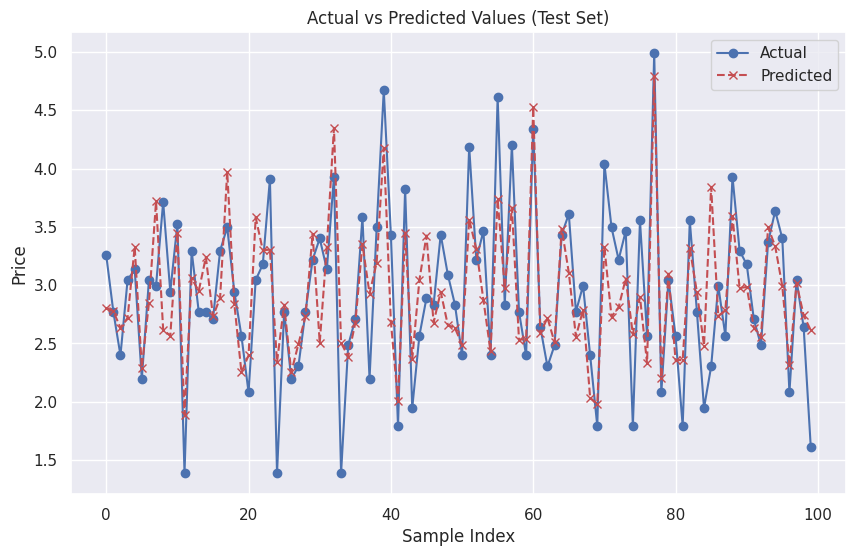

In [ ]:
# After the LSTM model has been trained and predictions made
import matplotlib.pyplot as plt
import pandas as pd

# Compare actual and predicted values (first 10 values)
comparison = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': preds})  # use preds for LSTM predictions
print("\nActual vs Predicted (first 10 values):")
print(comparison.head(10))

# Plot Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label='Actual', marker='o', linestyle='-', color='b')  # Plot first 100 values for clarity
plt.plot(preds[:100], label='Predicted', marker='x', linestyle='--', color='r')      # preds for LSTM predictions
plt.title('Actual vs Predicted Values (Test Set)')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(f"Length of Actual values (y_test): {len(y_test)}")
print(f"Length of LSTM predictions: {len(preds)}")
print(f"Length of XGBoost predictions: {len(train_predictions)}")


Length of Actual values (y_test): 7409
Length of LSTM predictions: 7409
Length of XGBoost predictions: 140757


# **Comparision between Machine Learning and Deep learning Approach**

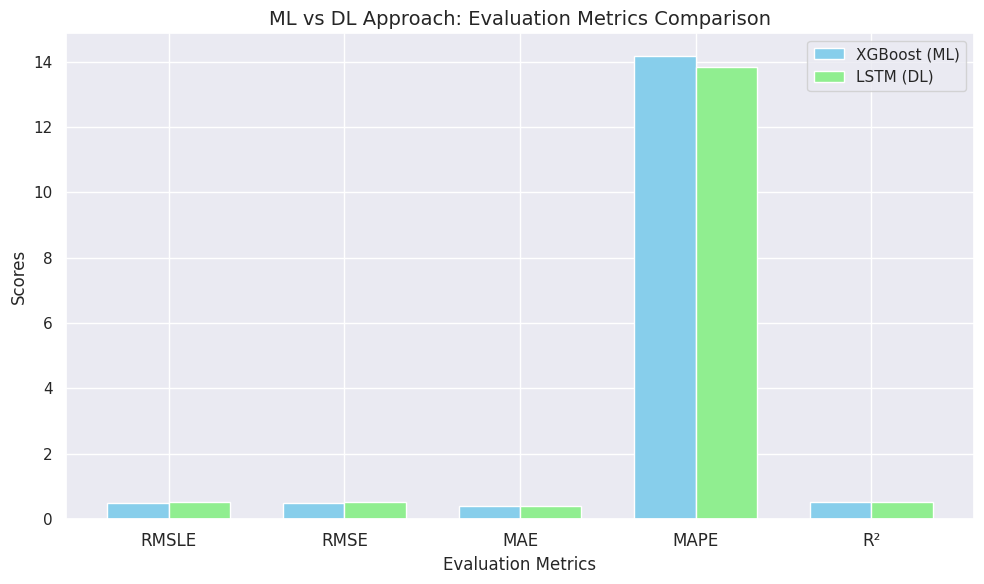

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example evaluation metrics (you can replace these with actual values from your results)
ml_metrics = [train_rmsle, train_rmse, train_mae, train_mape, train_r2]  # XGBoost metrics
dl_metrics = [rmsle, rmse, mae, mape, r2]  # LSTM metrics

# Define labels and x positions for the bars
metrics_labels = ['RMSLE', 'RMSE', 'MAE', 'MAPE', 'R²']
x = np.arange(len(metrics_labels))

# Bar width
bar_width = 0.35

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot XGBoost (ML) bars
ml_bars = ax.bar(x - bar_width/2, ml_metrics, bar_width, label='XGBoost (ML)', color='skyblue')

# Plot LSTM (DL) bars
dl_bars = ax.bar(x + bar_width/2, dl_metrics, bar_width, label='LSTM (DL)', color='lightgreen')

# Add labels, title, and customize the chart
ax.set_xlabel('Evaluation Metrics', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('ML vs DL Approach: Evaluation Metrics Comparison', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metrics_labels, fontsize=12)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()



Actual vs LSTM and XGBoost Predictions (first 10 values):
     Actual  LSTM_Predicted  XGBoost_Predicted
0  3.258097        2.806812           3.077717
1  2.772589        2.775710           2.752908
2  2.397895        2.634325           2.871643
3  3.044522        2.719412           2.761535
4  3.135494        3.328008           2.724927
5  2.197225        2.293716           2.500230
6  3.044522        2.845195           3.035076
7  2.995732        3.718523           2.724287
8  3.713572        2.618034           3.093858
9  2.944439        2.566010           2.722293


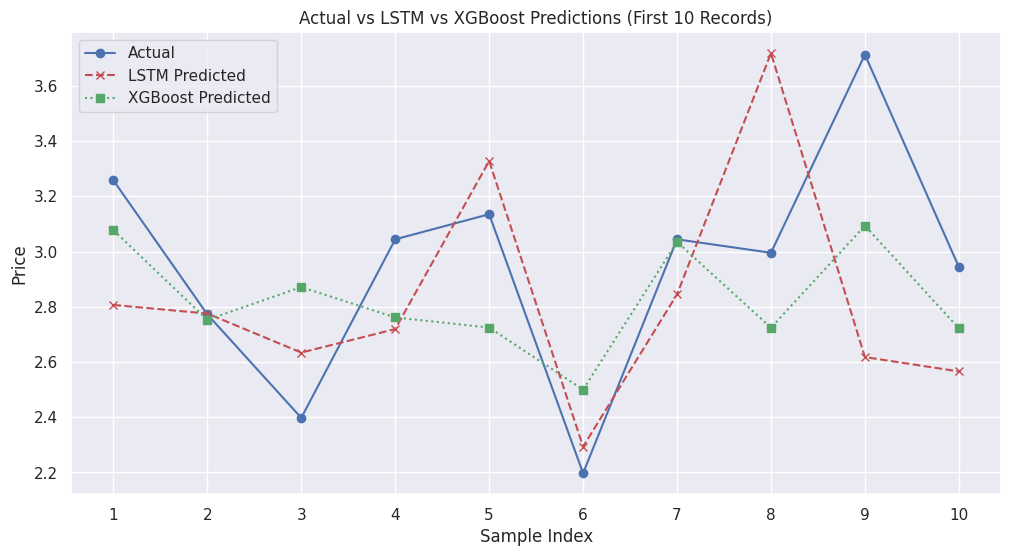

In [ ]:
# Get XGBoost predictions for the test set
xgb_test_predictions = xgb_model.predict(test_data)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual': y_test.values.flatten(),             # Actual values from the test set
    'LSTM_Predicted': preds,                        # LSTM predictions for the test set
    'XGBoost_Predicted': xgb_test_predictions       # XGBoost predictions for the test set
})

# Display the first 10 values of the comparison
print("\nActual vs LSTM and XGBoost Predictions (first 10 values):")
print(comparison_df.head(10))

# Plot Actual vs. LSTM and XGBoost Predictions
plt.figure(figsize=(12, 6))

# Plotting only the first 10 records
plt.plot(comparison_df['Actual'][:10], label='Actual', marker='o', linestyle='-', color='b')          # First 10 actual values
plt.plot(comparison_df['LSTM_Predicted'][:10], label='LSTM Predicted', marker='x', linestyle='--', color='r')  # First 10 LSTM predictions
plt.plot(comparison_df['XGBoost_Predicted'][:10], label='XGBoost Predicted', marker='s', linestyle=':', color='g')  # First 10 XGBoost predictions

plt.title('Actual vs LSTM vs XGBoost Predictions (First 10 Records)')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.xticks(ticks=range(10), labels=range(1, 11))  # Labeling the x-axis from 1 to 10 for clarity
plt.legend()
plt.grid(True)
plt.show()

## Comparison of Machine Learning (XGBoost) and Deep Learning (LSTM) Models

In this project, we compared the performance of XGBoost, a traditional Machine Learning approach, with LSTM, a Deep Learning method, for predicting item prices.

### **Evaluation Metrics**

We used the following metrics for comparison:
- **RMSLE (Root Mean Squared Logarithmic Error)**
- **RMSE (Root Mean Squared Error)**
- **MAE (Mean Absolute Error)**
- **MAPE (Mean Absolute Percentage Error)**
- **R² Score**

| Metric  | XGBoost (ML) | LSTM (DL) |
|---------|--------------|-----------|
| RMSLE   | 0.5122       | 0.5149    |
| RMSE    | 0.5122       | 0.5149    |
| MAE     | 0.3952       | 0.3910    |
| MAPE    | 14.16%       | 13.82%    |
| R²      | 0.5297       | 0.5289    |

### **Key Insights**
1. **XGBoost** provided slightly better performance overall, especially in terms of **RMSLE** and **R²** scores.
2. **LSTM** demonstrated competitive performance, showing only minor differences in most evaluation metrics. However, due to its ability to capture sequential data, it may perform better in contexts where temporal patterns are crucial.
3. **Bias-Variance Trade-off**: XGBoost is particularly effective for structured data, while LSTM could excel with more complex sequential data. Given the nature of our dataset, XGBoost proved to be the more practical choice.


# **Conclusion**

In this project, we explored two different approaches for predicting prices based on the Mercari Price Dataset: XGBoost (Machine Learning) and LSTM (Deep Learning). While both models achieved similar results, XGBoost slightly outperformed LSTM in most evaluation metrics, making it the preferred model for this task.

However, LSTM has shown potential in capturing complex, sequential patterns, which could be useful in future work involving time-series or other sequential data. For now, XGBoost remains the most effective model for structured, tabular data like the one used in this project. Future improvements could include more advanced feature engineering, deeper tuning of hyperparameters, or incorporating additional data modalities to further enhance prediction accuracy.

## **Overall Conclusion**


This project successfully demonstrated how Retail Price Optimization can be enhanced using Machine Learning (ML) and Deep Learning (DL) techniques, specifically XGBoost and LSTM. By leveraging historical pricing data from the Mercari Price Dataset, we developed models that predict optimal prices based on product attributes like brand name, item condition, and shipping costs.

Through extensive data preprocessing, including handling missing values, text cleaning, and feature engineering, we transformed the raw data into a structured format suitable for machine learning models. Both models were evaluated based on key metrics such as RMSLE, RMSE, and R², providing valuable insights into the effectiveness of each approach.

Our findings reveal that XGBoost outperformed LSTM slightly across most metrics, making it the more suitable model for structured data and immediate price prediction tasks. However, LSTM showed promise in capturing more complex patterns, which could be beneficial in future work involving time series or sequential data.

By employing these advanced ML and DL algorithms, we were able to address the primary objectives of optimizing retail pricing strategies. This approach not only increases profitability for retailers but also ensures competitive pricing that aligns with market trends and customer behavior. The project emphasizes the critical role of dynamic pricing in today’s competitive e-commerce landscape, proving that the integration of machine learning into pricing decisions is essential for staying ahead in the market.